In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [5]:
students = pd.read_csv("spotify_punk_sample.csv")

In [6]:
students.head()

,artist,genre,album,track,popularity,release_year,duration_ms,tempo,key,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,The Clash,punk,The Future Is Unwritten,White Riot - Alternate Demo Mix,3,1961,142067.0,103.262001,9.0,1.0,0.429,0.823,-5.781,0.1290,0.07890,0.815000,0.4330,0.336
1,The Clash,punk,The Future Is Unwritten,I'm So Bored with the U.S.A.,2,1961,140787.0,204.134003,4.0,1.0,0.245,0.948,-6.745,0.1290,0.17300,0.002130,0.4730,0.221
2,The Clash,punk,The Future Is Unwritten,Armagideon Time,4,1961,226640.0,168.145996,6.0,0.0,0.474,0.526,-8.557,0.1490,0.01090,0.000003,0.0789,0.449
3,The Vibrators,punk,Put On Your Best Dress - Sonia Pottinger's Ska...,Move Up (Festival 1967) (with The Fugitives),14,1966,164040.0,81.363998,5.0,1.0,0.667,0.340,-11.598,0.0301,0.91600,0.340000,0.1140,0.768
4,Ramones,punk,Blitzkrieg Bop,Blitzkrieg Bop,9,1976,115883.0,123.433998,9.0,1.0,0.532,0.955,-10.017,0.0896,0.00539,0.001380,0.9830,0.812


<Axes: xlabel='energy', ylabel='danceability'>

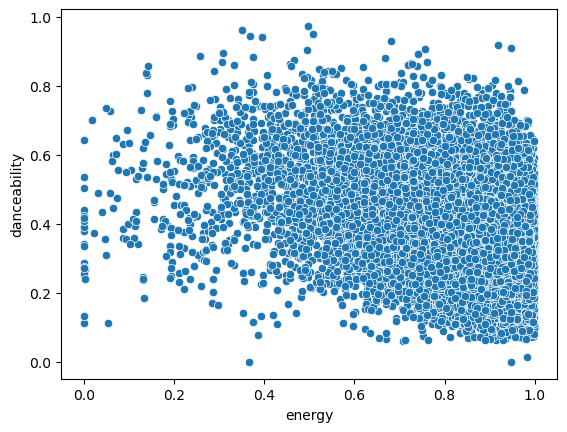

In [7]:
sns.scatterplot(data=students, x="energy", y="danceability")

In [8]:
features = students[['energy', 'danceability', 'valence']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [9]:
clustering = DBSCAN(eps=0.18, min_samples=10).fit(features_scaled)

ValueError: Input X contains NaN.
DBSCAN does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [61]:
clustering.labels_

array([ 0, -1, -1,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0, -1,  1,  1,  0,
       -1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0, -1,  0,  0, -1,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1, -1,  0,
        1,  0,  0,  0,  0, -1,  0, -1, -1, -1,  1, -1,  0,  0,  0, -1,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0, -1,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0, -1,  1, -1,  0,  1,  0,  0,  0, -1,
        0, -1,  0,  0,  0,  0,  1,  0,  1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0, -1,  0,  1,  0,  0,  0,  0,  0,  1,  0, -1,
        0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        1,  0,  0,  1,  0, -1,  0,  0, -1,  1,  0,  0, -1,  0,  1,  1,  0,
        1, -1,  0,  1,  0

In [62]:
silhouette_score(features_scaled, clustering.labels_)

0.4828515036450212

<Axes: xlabel='gpa', ylabel='days_absent'>

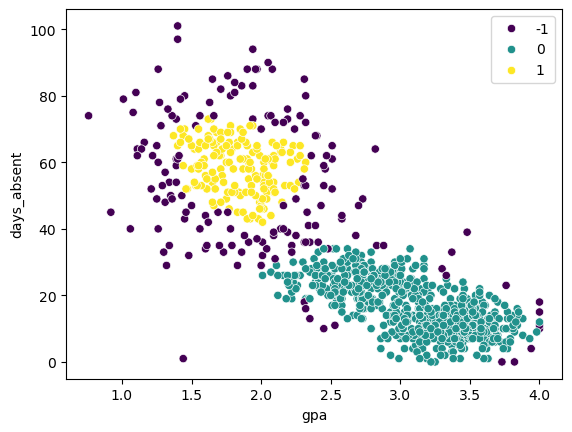

In [63]:
sns.scatterplot(data=students, x="gpa", y="days_absent", hue=clustering.labels_, palette='viridis')

In [26]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)

In [27]:
neigh.fit(features_scaled)

NearestNeighbors(n_neighbors=4)

In [33]:
distances, indices = neigh.kneighbors(return_distance=True)

In [34]:
distances

array([[0.05416457, 0.11243863, 0.11243863, 0.12159808],
       [0.12524363, 0.12649346, 0.13510723, 0.17489754],
       [0.10174692, 0.10832914, 0.10873371, 0.11243863],
       ...,
       [0.10832914, 0.24085331, 0.25735898, 0.27921582],
       [0.05621931, 0.08415523, 0.0983838 , 0.12159808],
       [0.        , 0.01405483, 0.01405483, 0.0483858 ]])

In [43]:
distances = distances[:,-1]

In [45]:
distances = np.sort(distances)

In [49]:
len(distances)

999

In [50]:
elbow_graph = {
    "Distances": distances,
    "Points": [i for i in range(999)]
}

In [51]:
df = pd.DataFrame(elbow_graph)

In [52]:
df.head()

,Distances,Points
0,0.014055,0
1,0.014055,1
2,0.014055,2
3,0.014055,3
4,0.014055,4


<Axes: xlabel='Points', ylabel='Distances'>

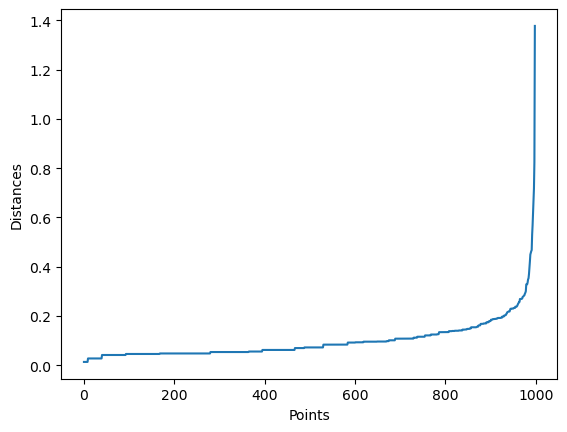

In [53]:
sns.lineplot(data=df, x="Points", y="Distances")